In [ ]:
!wget http://cb.lk/covid_19
!unzip covid_19

### Import Libraries

In [ ]:
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing import image
from tensorflow.keras.applications import DenseNet121
import PIL
import os
import matplotlib.pyplot as plt


### Load and Prepare Model

In [ ]:
# Download the architecture of DenseNet121 with ImageNet weights
base_model = DenseNet121(include_top=False, weights='imagenet')

# Taking the output of the last convolution block in DenseNet121
x = base_model.output

# Adding a Global Average Pooling layer
x = GlobalAveragePooling2D()(x)

# Adding a fully connected layer having 512 neurons
x = Dense(512, activation='relu')(x)

# Adding a fully connected layer having 2 neurons which will
# give the probability of image having either class
predictions = Dense(2, activation='softmax')(x)

# Model to be trained
model = Model(inputs=base_model.input, outputs=predictions)

# Training only top layers i.e. the layers which we have added in the end
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])


29097984/29084464 [==============================] - 0s 0us/step


### Prepare Data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the main directory for the dataset
main_dir = "/content/CovidDataset"

# Create data generators for training and testing with data augmentation for training
train_data = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,   # Randomly zoom images
    horizontal_flip=True  # Randomly flip images horizontally
)

test_data = ImageDataGenerator(rescale=1./255)  # Only normalize pixel values for testing

# Define directories for training and validation data
train_dir = os.path.join(main_dir, "Train")
test_dir = os.path.join(main_dir, "Val")

# Create data generators for training and validation
training_set = train_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,  # Number of images to return in each batch
    class_mode='categorical'  # For multi-class classification
)

test_set = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


### Train Model

In [ ]:
# Train the model using the training and validation datasets
results = model.fit_generator(
    training_set,
    steps_per_epoch=2,  # Number of steps per epoch
    epochs=20,  # Number of epochs
    validation_data=test_set,
    validation_steps=2  # Number of validation steps
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
2/2 [==============================] - 26s 8s/step - loss: 2.5592 - accuracy: 0.2656 - val_loss: 1.5087 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 5s 4s/step - loss: 0.7186 - accuracy: 0.7344 - val_loss: 1.1608 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 5s 4s/step - loss: 0.7208 - accuracy: 0.5781 - val_loss: 0.1379 - val_accuracy: 0.9500
Epoch 4/20
2/2 [==============================] - 5s 4s/step - loss: 0.1628 - accuracy: 0.9688 - val_loss: 0.1175 - val_accuracy: 0.9333
Epoch 5/20
2/2 [==============================] - 6s 4s/step - loss: 0.0867 - accuracy: 0.9688 - val_loss: 0.5017 - val_accuracy: 0.8167
Epoch 6/20
2/2 [==============================] - 5s 4s/step - loss: 0.4555 - accuracy: 0.8438 - val_loss: 0.3236 - val_accuracy: 0.8667
Epoch 7/20
2/2 [==============================] - 5s 4s/step - loss: 0.3412 - accuracy: 0.8594 - val_loss: 0.0397 - val_accuracy: 0.9833
Epoch 8/20
2/2 [========================

In [ ]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Evaluate and Plot Results

Text(0.5, 0, 'epoch')

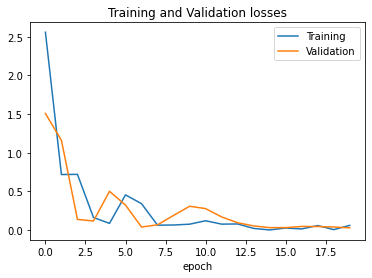

In [ ]:
%matplotlib inline

# Plot training and validation loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_set)
print('test loss :{}   test accuracy :{}'.format(test_loss,test_acc))

2/2 [==============================] - 2s 1s/step - loss: 0.0292 - accuracy: 0.9667
test loss :0.02916327305138111   test accuracy :0.9666666388511658
